In [1]:
# Depth vs Time transition for U, T in Stratification Runs
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import gsw

In [2]:
def UT_prof(datapath, case_id, xidx):
    
    State01 = xr.open_dataset(datapath + '/state_' + str(format(case_id,'03d')) + '.nc')    
    State = State01.isel(T=~State01.get_index("T").duplicated())
    state = State.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,45))
    Grid = xr.open_dataset(datapath + '/grid_' + str(format(case_id,'03d')) + '.nc') 
    grid = Grid.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,45))

    # Along-fjord velocity
    u0 = state.U.data # dims = T, Z, Y, Xp1
    u_ymean = (u0[:, :, :, 1:].mean(2) + u0[:, :, :, :-1].mean(2)) / 2
    #Uzt = u_ymean[:,:,xidx] # U in z, t dimensions
    Uzt = u0[:,:,:,xidx].mean(2).T
    
    # Potential temp
    Tzt = state.Temp.data[:,:,:,xidx].mean(2).T # Temp in z, t dimensions
    
    depth = state.Z.data
    time = state.T.data / 86400 # Time in days
    
    # Pressure and Density
    pres = gsw.p_from_z(depth, 55)
    Szt = state.S.data[:,:,:,xidx].mean(2).T
    p = np.tile(pres,[len(time),1]).T
    Rho = gsw.rho(Szt, Tzt, p)
    return depth, time, Uzt, Tzt, Rho

In [18]:
path1 = '/work/oceans/wbao/MITgcm_results/iceplume/4_Sz_minhs'
path2 = '/work/oceans/wbao/MITgcm_results/iceplume/Sal_Linear_nosill'
path3 = '/work/oceans/wbao/MITgcm_results/iceplume/2_Qsg_minhs'

caseN = 4
gf, sw, sc, se = 6, 120, 178, 235 # index for cross-fjord sections 0, 1, sill crest, 2

depth, time, U1, T1, Rho1 = UT_prof(path2, caseN, gf)
depth, time, U2, T2, Rho2 = UT_prof(path2, caseN, sw)
depth, time, U3, T3, Rho3 = UT_prof(path2, caseN, sc)
depth, time, U4, T4, Rho4 = UT_prof(path2, caseN, se)

In [7]:
depth[22]
#np.max(Rho3-1000), np.min(Rho3-1000), np.mean(Rho3-1000)
#U1.max(), U2.max(), U3.max(), U4.max()

-50.0

Text(0.5, 0, 'Time [days]')

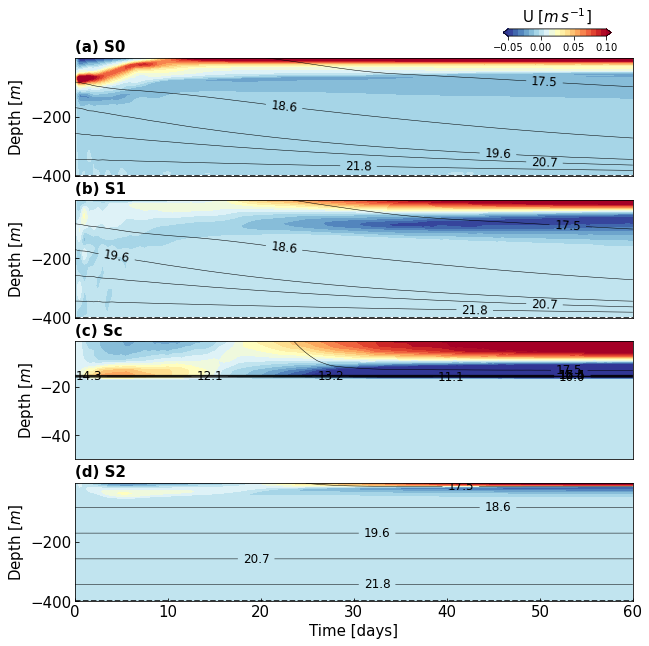

In [15]:
# Making plot for along-fjord velocity U
fig1 = plt.figure(figsize=(10,10))
fig1.tight_layout()  

cu = np.linspace(-0.05,0.1,20) # Contour range for U
crho = np.linspace(10,25,15) # Contour range for density
cmap = 'RdYlBu_r'

hs = 400
ax1 = fig1.add_subplot(411)
im1 = ax1.contourf(time, depth, U1, cu, cmap=cmap, extend='both')
ax1.axhline(y=-hs,color='k',linestyle='--')

# Plot isopycnals
CS1 = ax1.contour(time, depth, Rho1-1000, crho, colors='k', linewidths=.5)
plt.clabel(CS1, fmt='%1.1f', fontsize=12, inline=1)

cbaxes = fig1.add_axes([0.72, 0.91, 0.15, 0.01])
cbar = fig1.colorbar(im1,cax=cbaxes, orientation='horizontal')
cbar.set_ticks([-0.05,0,0.05,0.1])
cbar.ax.set_title('U [$m\,s^{-1}$]', size=15)

ax1.set_xlim(time[0],time[-1])
ax1.set_ylim(-400,depth[0])
ax1.xaxis.set_visible(False)
ax1.tick_params(direction='in', labelsize=15)
ax1.set_title('(a) S0', loc='left', size=15, weight='bold')
ax1.set_ylabel('Depth [$m$]', size=15)



ax2 = fig1.add_subplot(412)
im2 = ax2.contourf(time, depth, U2, cu, cmap=cmap, extend='both')
ax2.axhline(y=-hs,color='k',linestyle='--')
CS2 = ax2.contour(time, depth, Rho2-1000, crho, colors='k', linewidths=.5)
plt.clabel(CS2, fmt='%1.1f', fontsize=12, inline=1)


ax2.set_xlim(time[0],time[-1])
ax2.set_ylim(-400,depth[0])
ax2.xaxis.set_visible(False)
ax2.tick_params(direction='in', labelsize=15)
ax2.set_title('(b) S1', loc='left', size=15, weight='bold')
ax2.set_ylabel('Depth [$m$]', size=15)



ax3 = fig1.add_subplot(413)
im3 = ax3.contourf(time, depth, U3, cu, cmap=cmap, extend='both')
#ax3.axhline(y=-16,color='k',linestyle='--')
CS3 = ax3.contour(time, depth[:22], Rho3[:22,:]-1000, crho, colors='k', linewidths=.5) # hs=18, depth_ind=7
plt.clabel(CS3, fmt='%1.1f', fontsize=12, inline=1)


ax3.set_xlim(time[0],time[-1])
#ax3.set_ylim(depth[8],depth[0])
ax3.set_ylim(-50,depth[0])
ax3.xaxis.set_visible(False)
ax3.tick_params(direction='in', labelsize=15)
ax3.set_title('(c) Sc', loc='left', size=15, weight='bold')
ax3.set_ylabel('Depth [$m$]', size=15)



ax4 = fig1.add_subplot(414)
im4 = ax4.contourf(time, depth, U4, cu, cmap=cmap, extend='both')
CS4 = ax4.contour(time, depth[:-1], Rho4[:-1,:]-1000, crho, colors='k', linewidths=.5)
plt.clabel(CS4, fmt='%1.1f', fontsize=12, inline=1)
ax4.axhline(y=-hs,color='k',linestyle='--')

ax4.set_xlim(time[0],time[-1])
ax4.set_ylim(-400,depth[0])
ax4.tick_params(direction='in', labelsize=15)
ax4.set_title('(d) S2', loc='left', size=15, weight='bold')
ax4.set_ylabel('Depth [$m$]', size=15)
ax4.set_xlabel('Time [days]', size=15)

/home/1959/local/bin/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: No contour levels were found within the data range.


Text(0.5, 0, 'Time [days]')

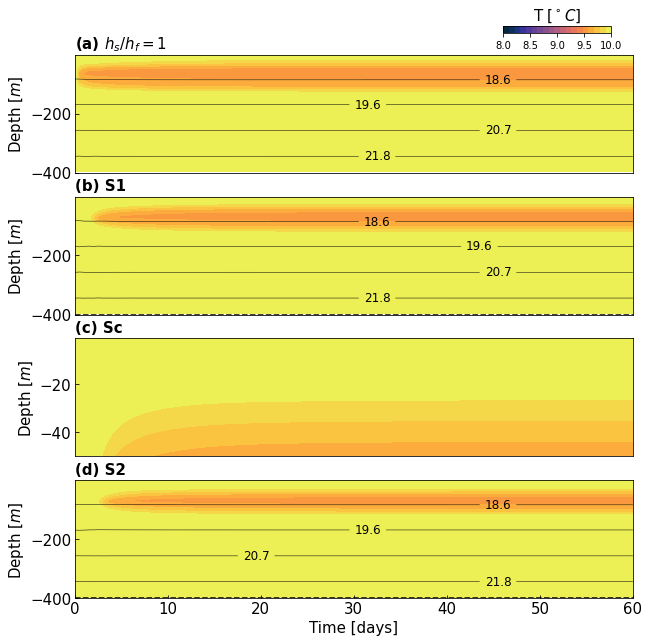

In [19]:
# Making plot for potential temperature
fig2 = plt.figure(figsize=(10,10))
fig2.tight_layout()  

ct = np.linspace(8,10,20) # Contour range for T
crho1 = np.linspace(10,25,15) # Contour range for density
crho2 = np.linspace(16,20,15) 


#cmap2 = 'YlGnBu_r'
import cmocean
cmap2 = cmocean.cm.thermal

ax1 = fig2.add_subplot(411)
im1 = ax1.contourf(time, depth, T1, ct, cmap=cmap2)
# Plot isopycnals
CS1 = ax1.contour(time, depth, Rho1-1000, crho1, colors='k', linewidths=.5)
plt.clabel(CS1, fmt='%1.1f', fontsize=12, inline=1)
#ax1.axhline(y=-hs,color='k',linestyle='--')

cbaxes = fig2.add_axes([0.72, 0.91, 0.15, 0.01])
cbar = fig2.colorbar(im1,cax=cbaxes, orientation='horizontal')
cbar.set_ticks([8,8.5,9,9.5,10])
cbar.ax.set_title('T [$^\circ C$]', size=15)

ax1.set_xlim(time[0],time[-1])
ax1.set_ylim(-400,depth[0])
ax1.xaxis.set_visible(False)
ax1.tick_params(direction='in', labelsize=15)
ax1.set_title('(a) $h_s/h_f=1$', loc='left', size=15, weight='bold')
ax1.set_ylabel('Depth [$m$]', size=15)



ax2 = fig2.add_subplot(412)
im2 = ax2.contourf(time, depth, T2, ct, cmap=cmap2)
CS2 = ax2.contour(time, depth, Rho2-1000, crho1, colors='k', linewidths=.5)
plt.clabel(CS2, fmt='%1.1f', fontsize=12, inline=1)
ax2.axhline(y=-hs,color='k',linestyle='--')

ax2.set_xlim(time[0],time[-1])
ax2.set_ylim(-400,depth[0])
ax2.xaxis.set_visible(False)
ax2.tick_params(direction='in', labelsize=15)
ax2.set_title('(b) S1', loc='left', size=15, weight='bold')
ax2.set_ylabel('Depth [$m$]', size=15)



ax3 = fig2.add_subplot(413)
im3 = ax3.contourf(time, depth, T3, ct, cmap=cmap2)
#ax3.axhline(y=-16,color='k',linestyle='--')
CS3 = ax3.contour(time, depth[:22], Rho3[:22,:]-1000, crho1, colors='k', linewidths=.5)
plt.clabel(CS3, fmt='%1.1f', fontsize=12, inline=1)

ax3.set_xlim(time[0],time[-1])
ax3.set_ylim(-50,depth[0])
ax3.xaxis.set_visible(False)
ax3.tick_params(direction='in', labelsize=15)
ax3.set_title('(c) Sc', loc='left', size=15, weight='bold')
ax3.set_ylabel('Depth [$m$]', size=15)



ax4 = fig2.add_subplot(414)
im4 = ax4.contourf(time, depth, T4, ct, cmap=cmap2)
CS4 = ax4.contour(time, depth[:-1], Rho4[:-1,:]-1000, crho1, colors='k', linewidths=.5)
plt.clabel(CS4, fmt='%1.1f', fontsize=12, inline=1)
ax4.axhline(y=-hs,color='k',linestyle='--')

ax4.set_xlim(time[0],time[-1])
ax4.set_ylim(-400,depth[0])
ax4.tick_params(direction='in', labelsize=15)
ax4.set_title('(d) S2', loc='left', size=15, weight='bold')
ax4.set_ylabel('Depth [$m$]', size=15)
ax4.set_xlabel('Time [days]', size=15)

In [12]:
fig_path ="/home/1959/Jupyter_Figs/FjordModeling/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)
fig1.savefig(fig_path + '/1N0-maxhs_Utime.png', dpi=300, bbox_inches='tight')
#fig2.savefig(fig_path + '/3N0-minhs_Ttime.png', dpi=300, bbox_inches='tight') 

In [2]:
def plume_rising_rate(datapath, case_id):
    
    State01 = xr.open_dataset(datapath + '/state_' + str(format(case_id,'03d')) + '.nc')    
    State = State01.isel(T=~State01.get_index("T").duplicated())
    state = State.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,45))
    
    time = state.T.data / 86400 # Time in days
    depth = state.Z.data
    # Along-fjord velocity
    u0 = state.U.data # dims = T, Z, Y, Xp1
    u_ymean = (u0[:, :, :, 1:].mean(2) + u0[:, :, :, :-1].mean(2)) / 2
    #Uzt = u_ymean[:,:,xidx] # U in z, t dimensions
    xidx = 6 # near glacier front
    Uzt = u0[:,:,:,xidx].mean(2)
    
    count = 0
    Upos = np.empty(Uzt.shape[0])
    for i in range(Uzt.shape[0]):
        if np.any(Uzt[i, :]>0):
            Upos[i] = np.where(Uzt[i, :] == Uzt[i, :].max())[-1][0]
        else:
            Upos[i] = 'nan'
#         if Upos[i] >= Upos[i-1]:
#             count += 1
#         else:
#             pass
    return depth, time, Uzt, Upos

In [3]:
path1 = '/work/oceans/wbao/MITgcm_results/iceplume/Sal_Linear_minhs'
caseN = np.array([1,2,3,4,5])

depth, time, Uz0, Up0 = plume_rising_rate(path1, caseN[0])
depth, time, Uz1, Up1 = plume_rising_rate(path1, caseN[1])
depth, time, Uz2, Up2 = plume_rising_rate(path1, caseN[2])
depth, time, Uz3, Up3 = plume_rising_rate(path1, caseN[3])
depth, time, Uz4, Up4 = plume_rising_rate(path1, caseN[4])

In [52]:
print(Up0,'\n', Up1,'\n', Up2,'\n', Up3, '\n', Up4)

[nan 55. 54. 54. 54. 54. 54. 54. 53. 53. 51. 51. 49. 47. 45. 44. 43. 42.
 42. 41. 40. 40. 40. 39. 39. 38. 38. 37. 37. 36. 36. 35. 35. 35. 34. 34.
 33. 33. 32. 32. 31. 31. 31. 30. 30. 29. 29. 29. 28. 28. 27. 27. 27. 26.
 26. 25. 25. 25. 24. 24. 24. 23. 23. 22. 22. 22. 22. 21. 21. 21. 20. 20.
 20. 19. 18. 18. 17. 16. 15. 14. 13. 12. 12. 11. 10. 10. 10. 10.  9.  9.
  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.
  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.] 
 [nan 50. 51. 50. 50. 50. 50. 49. 49. 48. 46. 44. 41. 39. 37. 36. 35. 34.
 34. 33. 33. 32. 32. 31. 30. 30. 29. 29. 28. 28. 27. 27. 26. 26. 25. 25.
 24. 24. 24. 23. 23. 22. 22. 21. 21. 20. 20. 19. 19. 18. 17. 16. 15. 14.
 13. 12. 11. 10. 10.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.
  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.] 
 [nan 41. 41.

In [73]:
np.where(Up0==9)[-1][0], np.where(Up1==9)[-1][0], np.where(Up2==10)[-1][0], np.where(Up3==0)[-1][0]

(88, 59, 34, 23)

In [75]:
rate0 = (depth[9]-depth[55]) / (time[88]-time[1])
rate1 = (depth[9]-depth[50]) / (time[59]-time[1])
rate2 = (depth[10]-depth[41]) / (time[34]-time[1])
rate3 = (depth[0]-depth[27]) / (time[23]-time[1])

In [72]:
print(rate0, rate1, rate2, rate3)

4.0 4.9655172413793105 6.866666666666666 6.2727272727272725


In [4]:
time

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
       27.5, 28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5,
       33. , 33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. ,
       38.5, 39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5,
       44. , 44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. ,
       49.5, 50. , 50.5, 51. , 51.5, 52. , 52.5, 53. , 53.5, 54. , 54.5,
       55. , 55.5, 56. , 56.5, 57. , 57.5, 58. , 58.5, 59. , 59.5, 60. ])